In [3]:
import pandas as pd

# Load the dataset
file_path = "data/Steel_Plates_Processed_Dataset.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(data.head())

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             

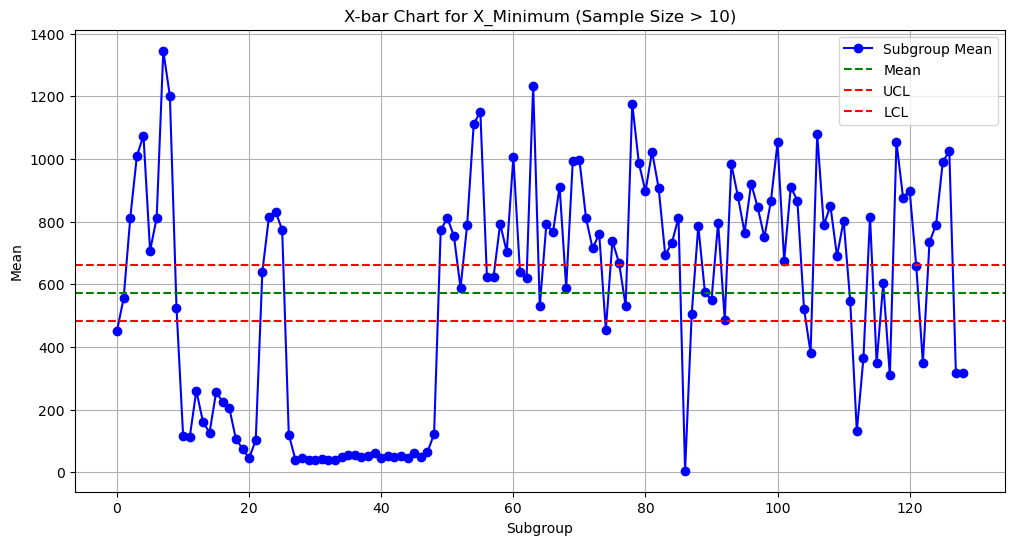

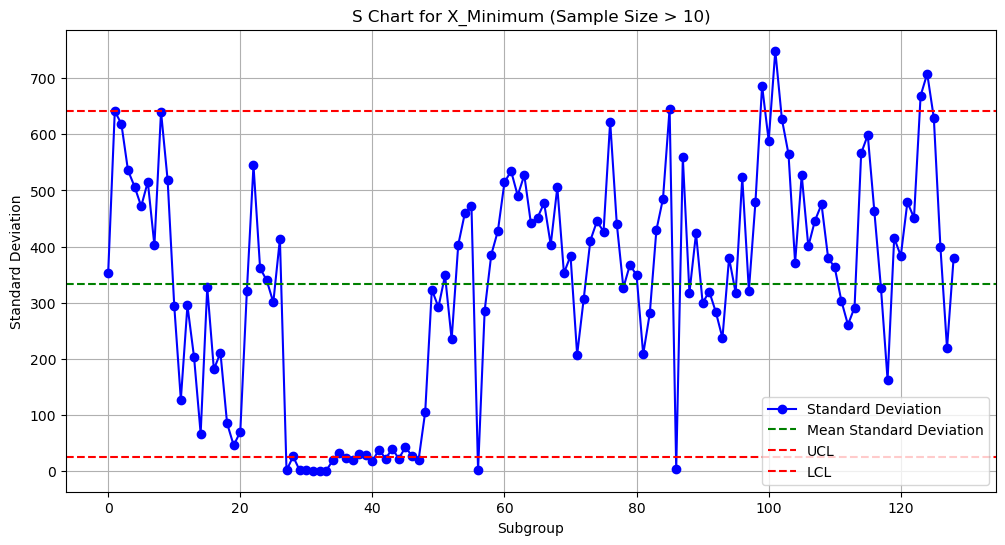

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
sample_size = 15  # Larger sample size (> 10)
num_samples = len(data) // sample_size
subgroups = data["X_Minimum"][: num_samples * sample_size].values.reshape(
    num_samples, sample_size
)

# Calculate subgroup means and standard deviations
subgroup_means = np.mean(subgroups, axis=1)
subgroup_stds = np.std(
    subgroups, axis=1, ddof=1
)  # Use ddof=1 for sample standard deviation

# Calculate overall mean and mean standard deviation
X_double_bar = np.mean(subgroup_means)
S_bar = np.mean(subgroup_stds)

# Control limits for X-bar chart
A3 = 0.267  # Constant for sample size 15 (from SPC control chart constants table)
UCL_X = X_double_bar + A3 * S_bar
LCL_X = X_double_bar - A3 * S_bar

# Control limits for S chart
B4, B3 = 1.924, 0.076  # Constants for sample size 15
UCL_S = B4 * S_bar
LCL_S = B3 * S_bar

# Plot X-bar chart
plt.figure(figsize=(12, 6))
plt.plot(subgroup_means, marker="o", linestyle="-", color="b", label="Subgroup Mean")
plt.axhline(X_double_bar, color="g", linestyle="--", label="Mean")
plt.axhline(UCL_X, color="r", linestyle="--", label="UCL")
plt.axhline(LCL_X, color="r", linestyle="--", label="LCL")
plt.title("X-bar Chart for X_Minimum (Sample Size > 10)")
plt.xlabel("Subgroup")
plt.ylabel("Mean")
plt.legend()
plt.grid(True)
plt.show()

# Plot S chart
plt.figure(figsize=(12, 6))
plt.plot(
    subgroup_stds, marker="o", linestyle="-", color="b", label="Standard Deviation"
)
plt.axhline(S_bar, color="g", linestyle="--", label="Mean Standard Deviation")
plt.axhline(UCL_S, color="r", linestyle="--", label="UCL")
plt.axhline(LCL_S, color="r", linestyle="--", label="LCL")
plt.title("S Chart for X_Minimum (Sample Size > 10)")
plt.xlabel("Subgroup")
plt.ylabel("Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()

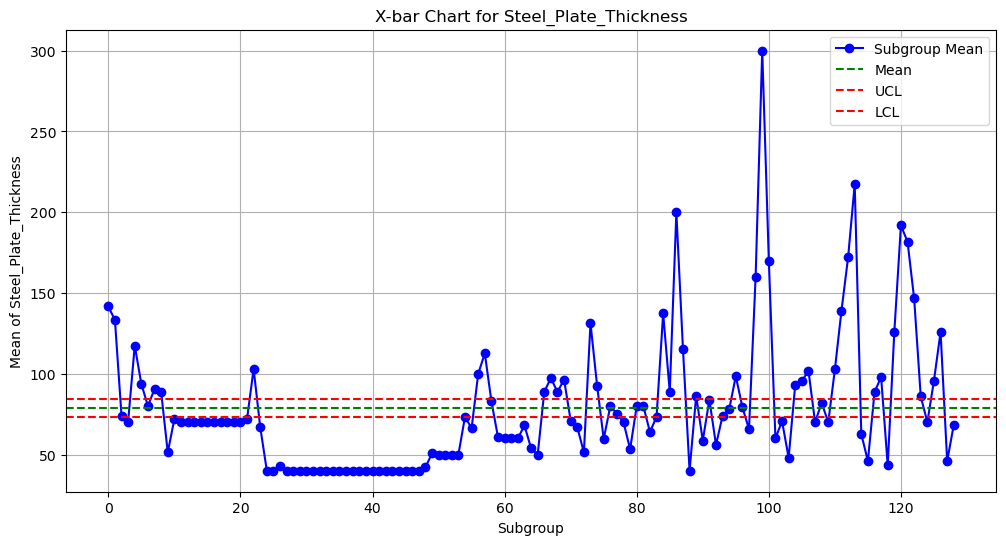

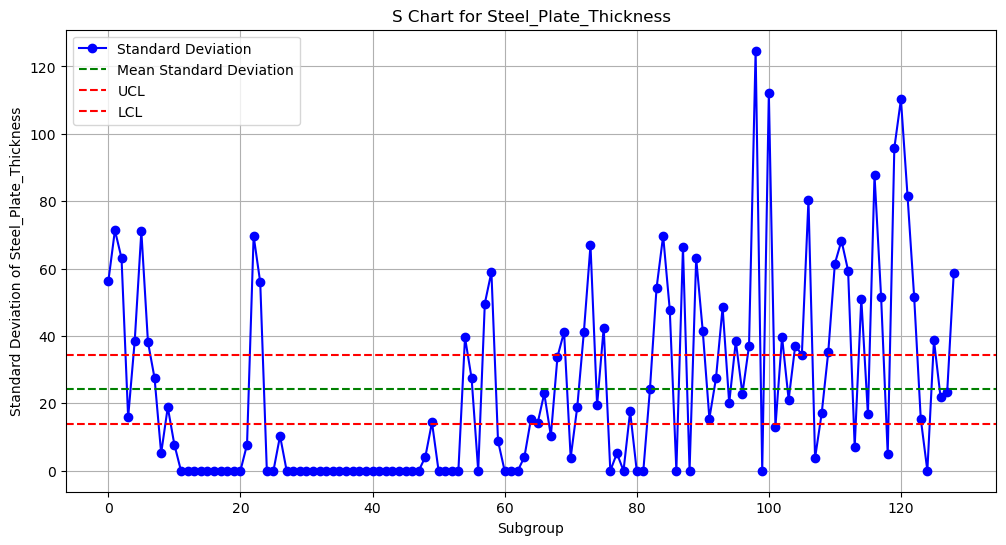

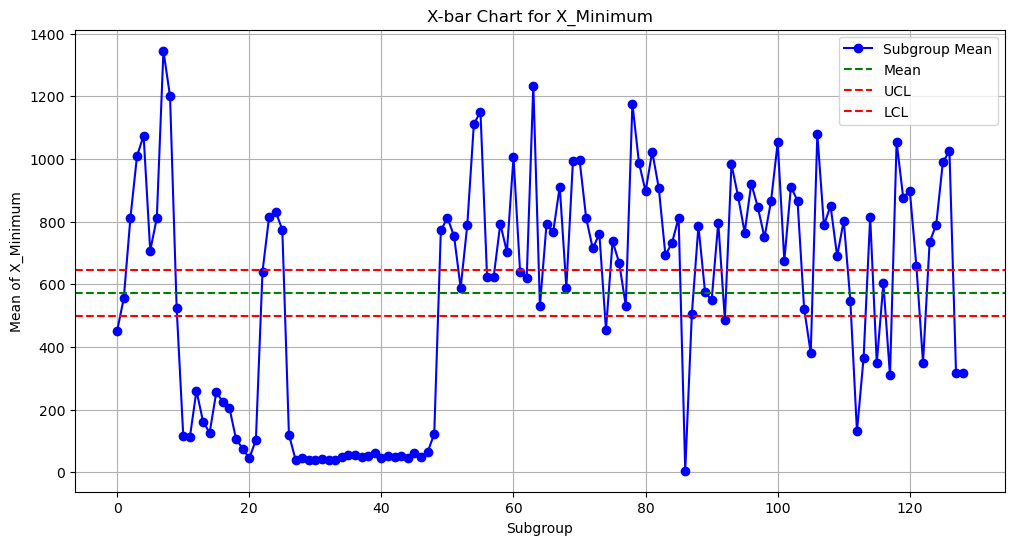

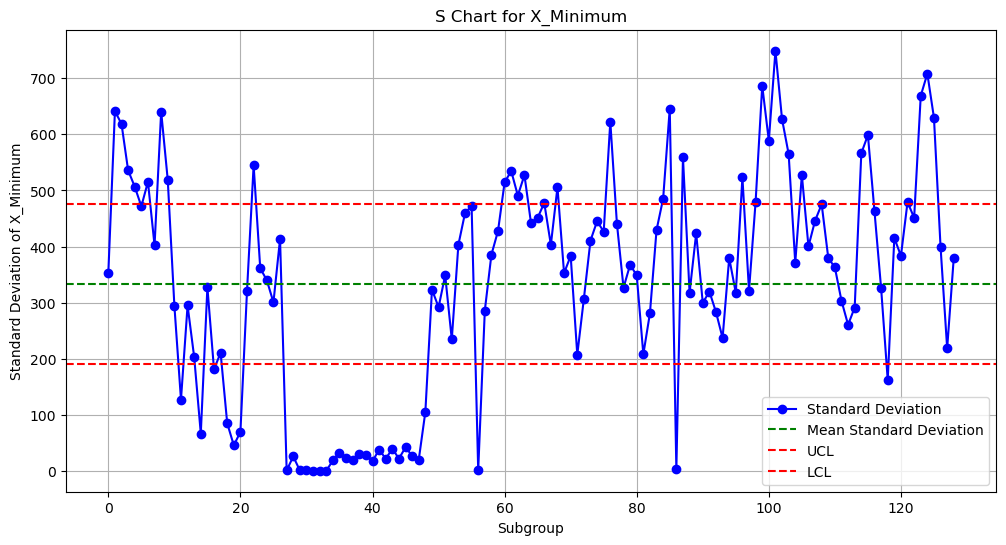

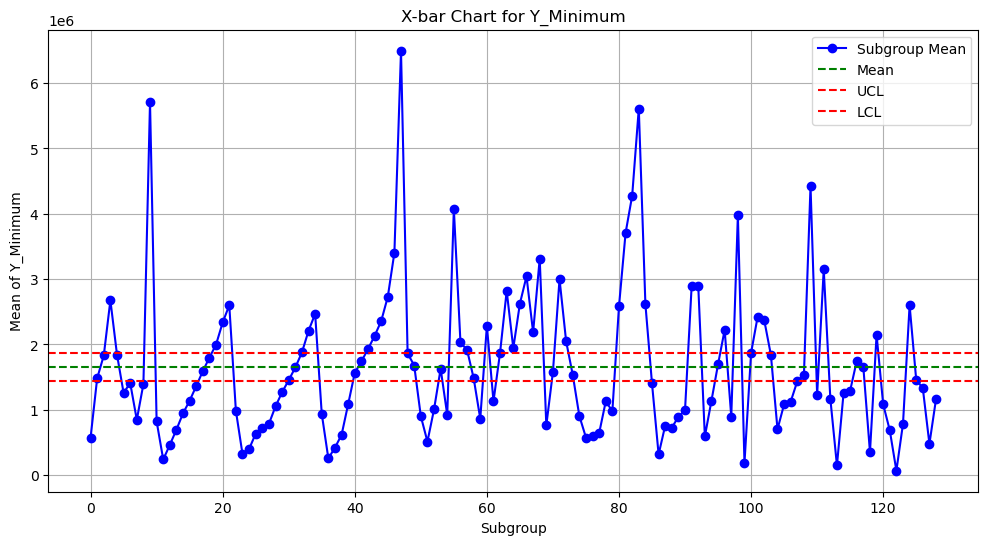

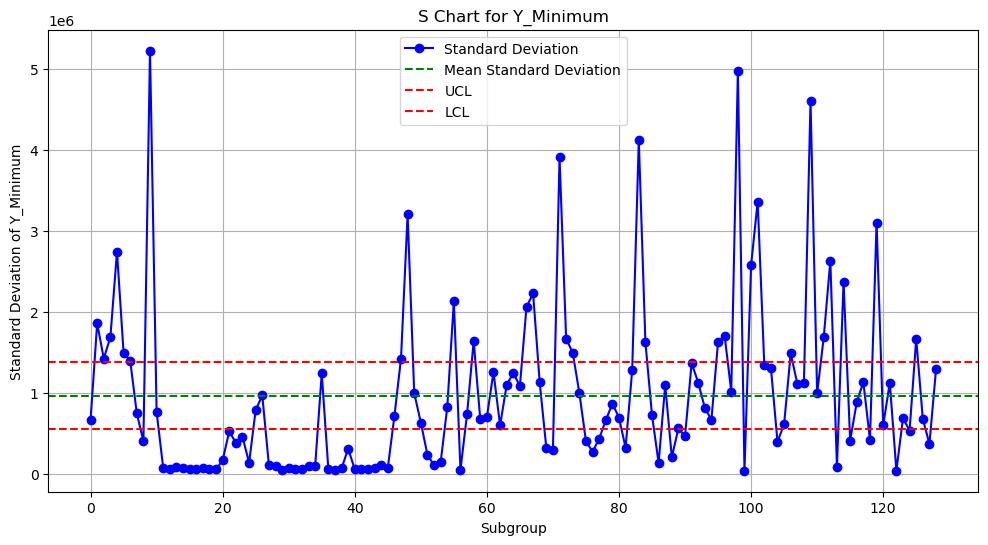

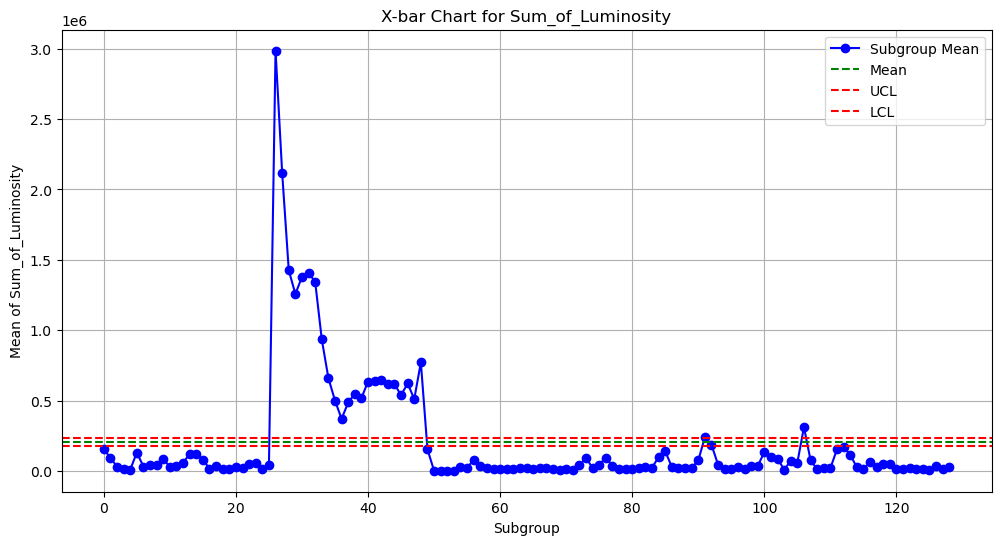

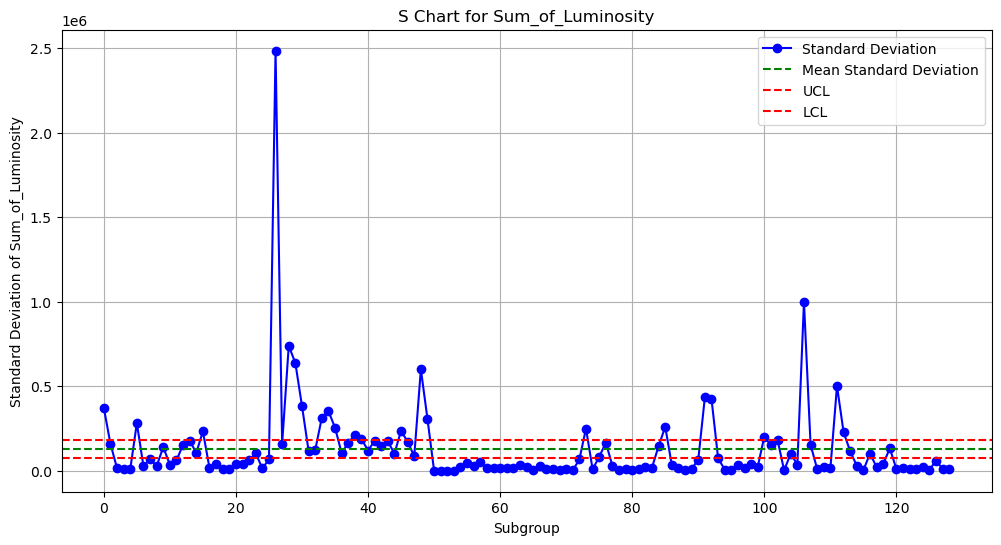

In [16]:
# Function to plot X-bar and S-charts for a given continuous variable
def plot_xbar_s_chart(variable_name):
    # Define parameters
    sample_size = 15  # Choose a sample size greater than 10 for S-charts
    num_samples = len(data) // sample_size
    subgroups = data[variable_name][: num_samples * sample_size].values.reshape(
        num_samples, sample_size
    )

    # Calculate subgroup means and standard deviations
    subgroup_means = np.mean(subgroups, axis=1)
    subgroup_stds = np.std(
        subgroups, axis=1, ddof=1
    )  # ddof=1 for sample standard deviation

    # Calculate overall mean and mean standard deviation
    X_double_bar = np.mean(subgroup_means)
    S_bar = np.mean(subgroup_stds)

    # Control limits for X-bar chart
    A3 = 0.223  # Constant for sample size 15 (from SPC control chart constants table)
    UCL_X = X_double_bar + A3 * S_bar
    LCL_X = X_double_bar - A3 * S_bar

    # Control limits for S chart
    B4, B3 = 1.427, 0.574  # Constants for sample size 15
    UCL_S = B4 * S_bar
    LCL_S = B3 * S_bar

    # Plot X-bar chart
    plt.figure(figsize=(12, 6))
    plt.plot(
        subgroup_means, marker="o", linestyle="-", color="b", label="Subgroup Mean"
    )
    plt.axhline(X_double_bar, color="g", linestyle="--", label="Mean")
    plt.axhline(UCL_X, color="r", linestyle="--", label="UCL")
    plt.axhline(LCL_X, color="r", linestyle="--", label="LCL")
    plt.title(f"X-bar Chart for {variable_name}")
    plt.xlabel("Subgroup")
    plt.ylabel(f"Mean of {variable_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot S chart
    plt.figure(figsize=(12, 6))
    plt.plot(
        subgroup_stds, marker="o", linestyle="-", color="b", label="Standard Deviation"
    )
    plt.axhline(S_bar, color="g", linestyle="--", label="Mean Standard Deviation")
    plt.axhline(UCL_S, color="r", linestyle="--", label="UCL")
    plt.axhline(LCL_S, color="r", linestyle="--", label="LCL")
    plt.title(f"S Chart for {variable_name}")
    plt.xlabel("Subgroup")
    plt.ylabel(f"Standard Deviation of {variable_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


# List of key continuous variables to monitor
key_variables = ["Steel_Plate_Thickness", "X_Minimum", "Y_Minimum", "Sum_of_Luminosity"]

# Generate X-bar and S-charts for each key variable
for variable in key_variables:
    plot_xbar_s_chart(variable)

In [7]:
print(data.columns)

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'Sigmoid_Index', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')


In [10]:
# Check the unique values and their counts in the Defective column
print(data['Defective'].value_counts())


Defective
1    1941
Name: count, dtype: int64


In [12]:
# Check the distribution of the Total_Defects column
print(data["Total_Defects"].value_counts())

Total_Defects
1    1941
Name: count, dtype: int64


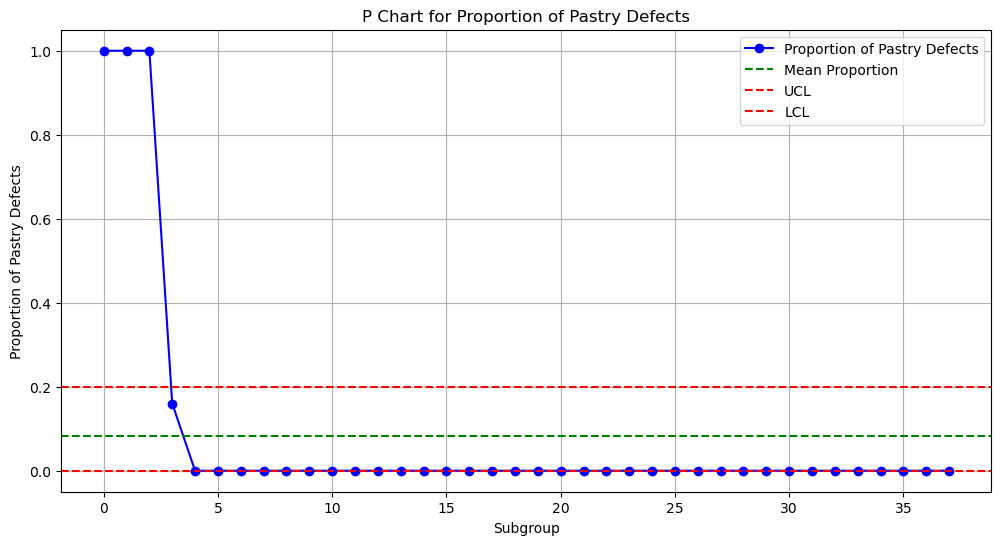

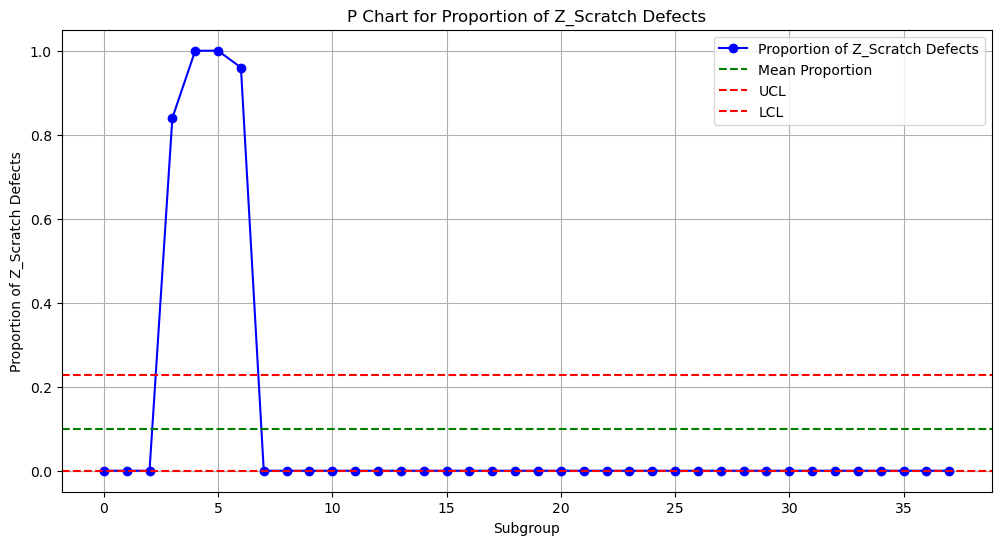

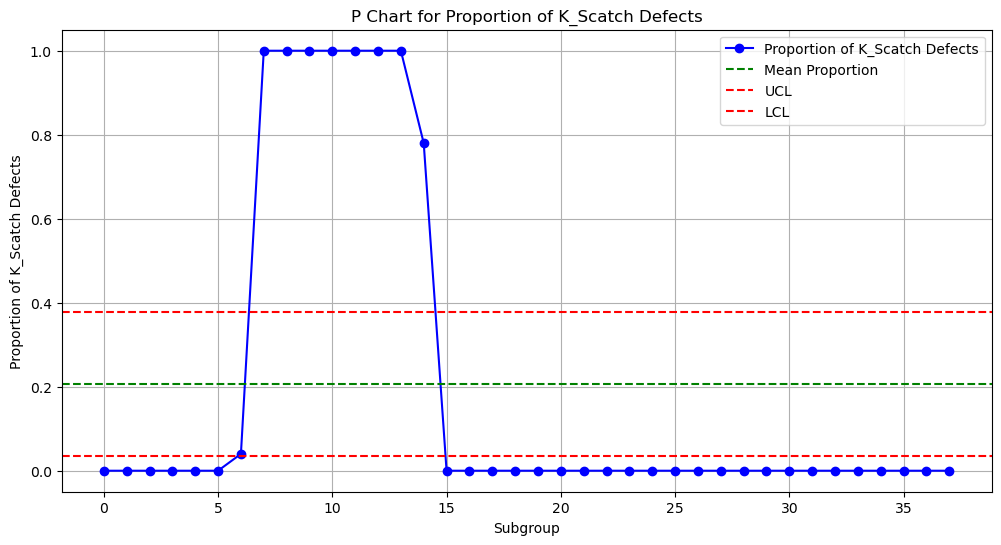

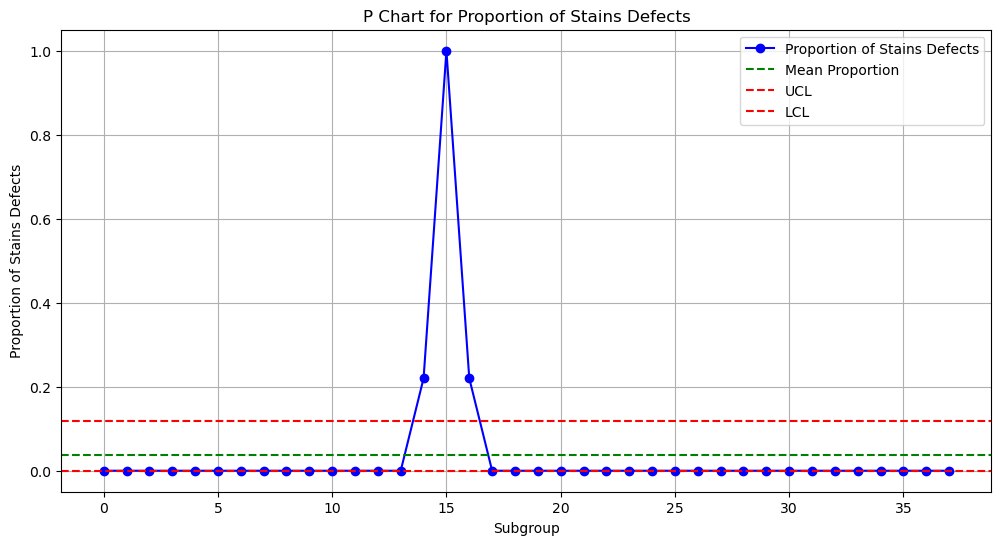

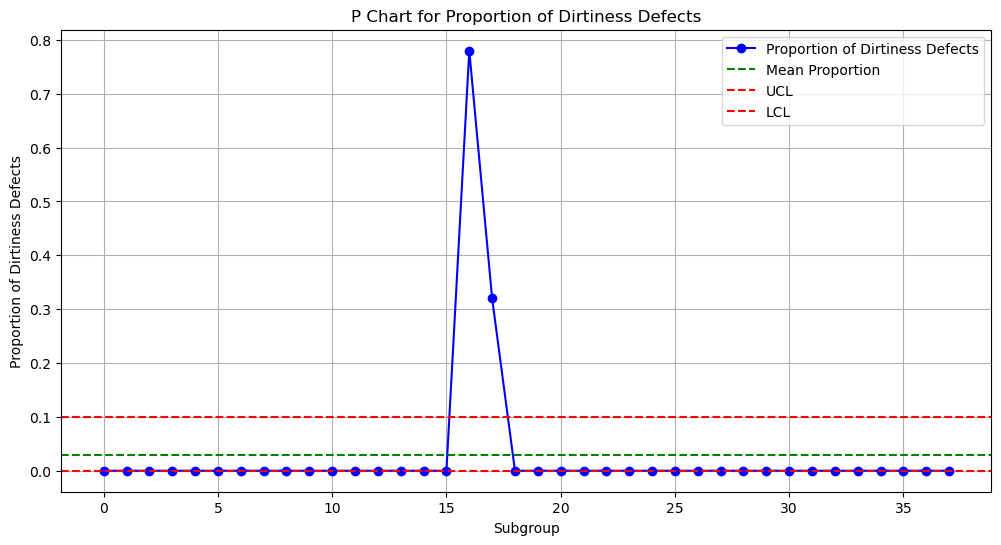

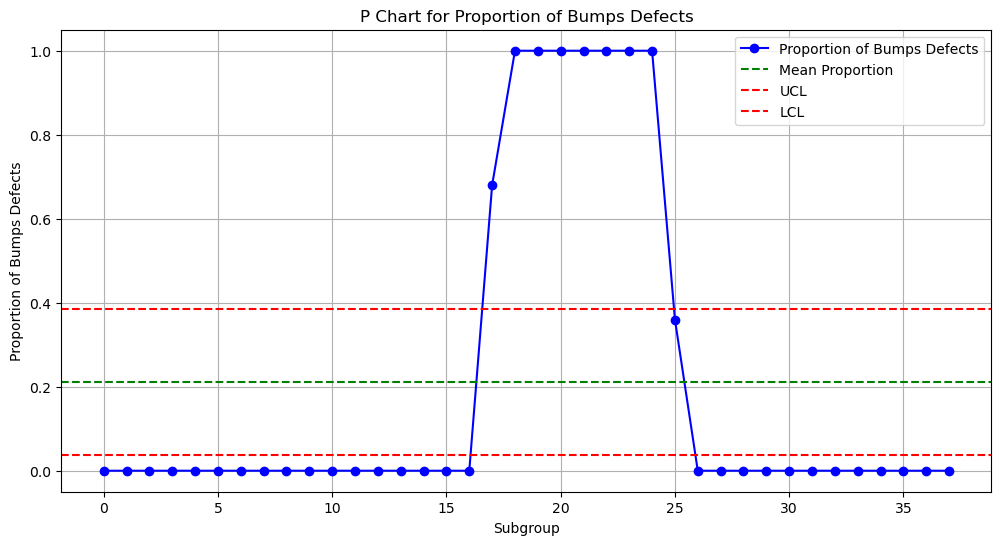

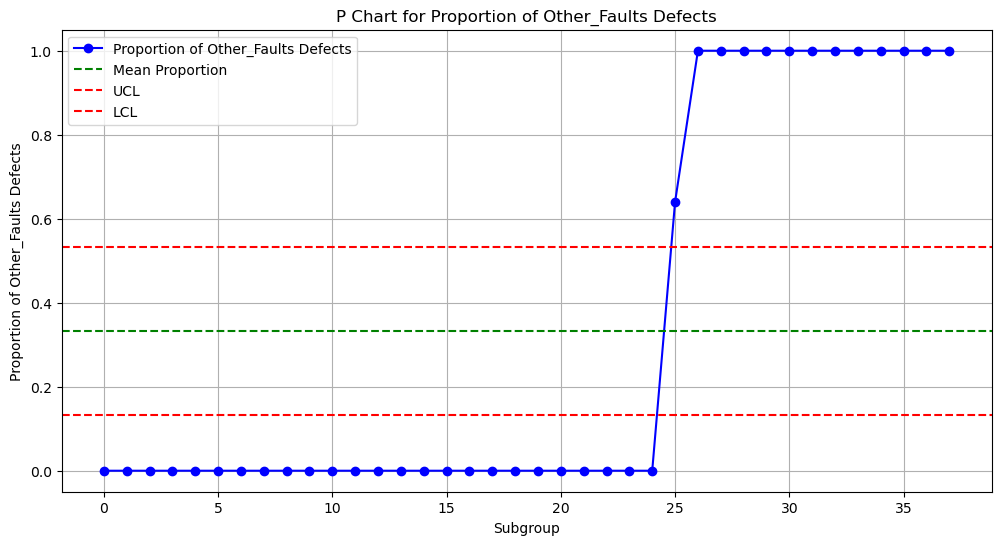

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Fault type columns
fault_types = [
    "Pastry",
    "Z_Scratch",
    "K_Scatch",
    "Stains",
    "Dirtiness",
    "Bumps",
    "Other_Faults",
]

# Sample size for subgroups
sample_size = 50
num_subgroups = len(data) // sample_size


# Function to plot P-chart for a given fault type
def plot_p_chart(fault_type):
    # Calculate proportion of defects for the fault type
    defects = (
        data[fault_type][: num_subgroups * sample_size]
        .values.reshape(num_subgroups, sample_size)
        .sum(axis=1)
    )
    proportion_defects = defects / sample_size
    p_bar = np.mean(proportion_defects)

    # Control limits for P-chart
    UCL_P = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / sample_size)
    LCL_P = max(p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / sample_size), 0)

    # Plot P-chart
    plt.figure(figsize=(12, 6))
    plt.plot(
        proportion_defects,
        marker="o",
        linestyle="-",
        color="b",
        label=f"Proportion of {fault_type} Defects",
    )
    plt.axhline(p_bar, color="g", linestyle="--", label="Mean Proportion")
    plt.axhline(UCL_P, color="r", linestyle="--", label="UCL")
    plt.axhline(LCL_P, color="r", linestyle="--", label="LCL")
    plt.title(f"P Chart for Proportion of {fault_type} Defects")
    plt.xlabel("Subgroup")
    plt.ylabel(f"Proportion of {fault_type} Defects")
    plt.legend()
    plt.grid(True)
    plt.show()


# Generate P-charts for all fault types
for fault_type in fault_types:
    plot_p_chart(fault_type)

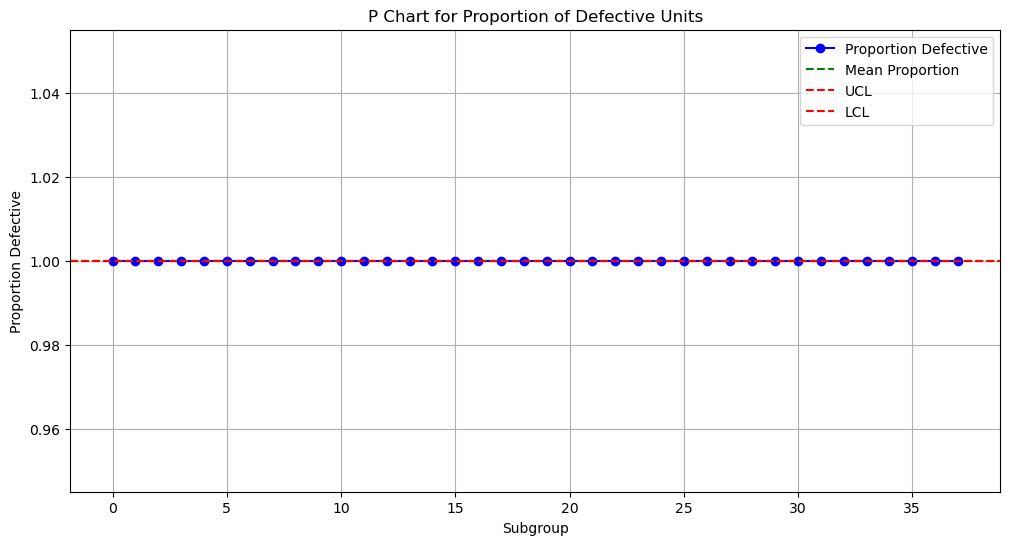

In [8]:
# Create a binary 'Defective' column: 1 if any fault is present, 0 otherwise
data["Defective"] = data[
    ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
].max(axis=1)

# Define sample size and number of subgroups
sample_size = 50
num_subgroups = len(data) // sample_size

# Calculate proportion of defectives for each subgroup
defective_counts = (
    data["Defective"][: num_subgroups * sample_size]
    .values.reshape(num_subgroups, sample_size)
    .sum(axis=1)
)
proportion_defective = defective_counts / sample_size
p_bar = np.mean(proportion_defective)

# Control limits for P chart
UCL_P = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / sample_size)
LCL_P = max(p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / sample_size), 0)

# Plot P-chart
plt.figure(figsize=(12, 6))
plt.plot(
    proportion_defective,
    marker="o",
    linestyle="-",
    color="b",
    label="Proportion Defective",
)
plt.axhline(p_bar, color="g", linestyle="--", label="Mean Proportion")
plt.axhline(UCL_P, color="r", linestyle="--", label="UCL")
plt.axhline(LCL_P, color="r", linestyle="--", label="LCL")
plt.title("P Chart for Proportion of Defective Units")
plt.xlabel("Subgroup")
plt.ylabel("Proportion Defective")
plt.legend()
plt.grid(True)
plt.show()

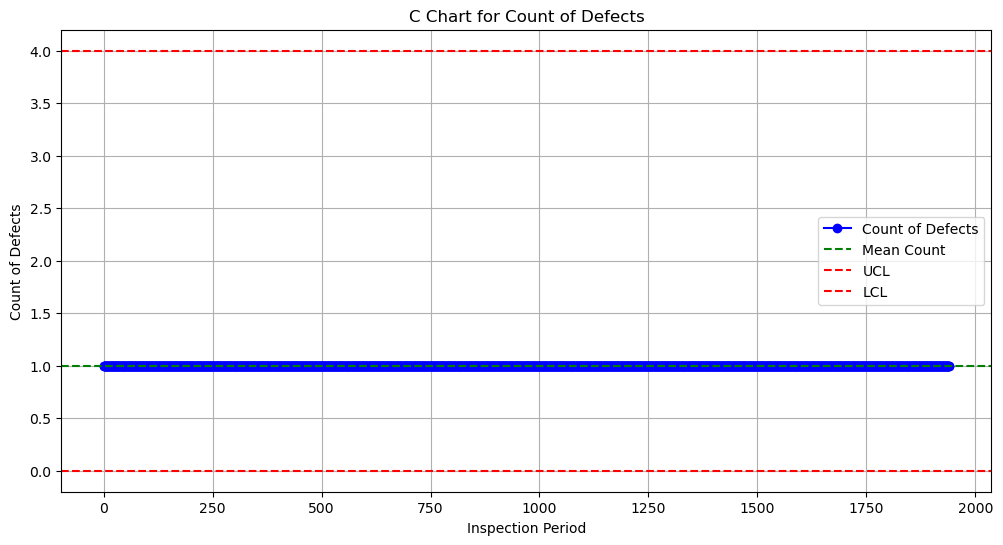

In [9]:
# Calculate total count of defects for each unit
data["Total_Defects"] = data[
    ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
].sum(axis=1)

# Calculate mean count of defects (C-bar)
C_bar = np.mean(data["Total_Defects"])

# Control limits for C chart
UCL_C = C_bar + 3 * np.sqrt(C_bar)
LCL_C = max(C_bar - 3 * np.sqrt(C_bar), 0)

# Plot C-chart
plt.figure(figsize=(12, 6))
plt.plot(
    data["Total_Defects"],
    marker="o",
    linestyle="-",
    color="b",
    label="Count of Defects",
)
plt.axhline(C_bar, color="g", linestyle="--", label="Mean Count")
plt.axhline(UCL_C, color="r", linestyle="--", label="UCL")
plt.axhline(LCL_C, color="r", linestyle="--", label="LCL")
plt.title("C Chart for Count of Defects")
plt.xlabel("Inspection Period")
plt.ylabel("Count of Defects")
plt.legend()
plt.grid(True)
plt.show()

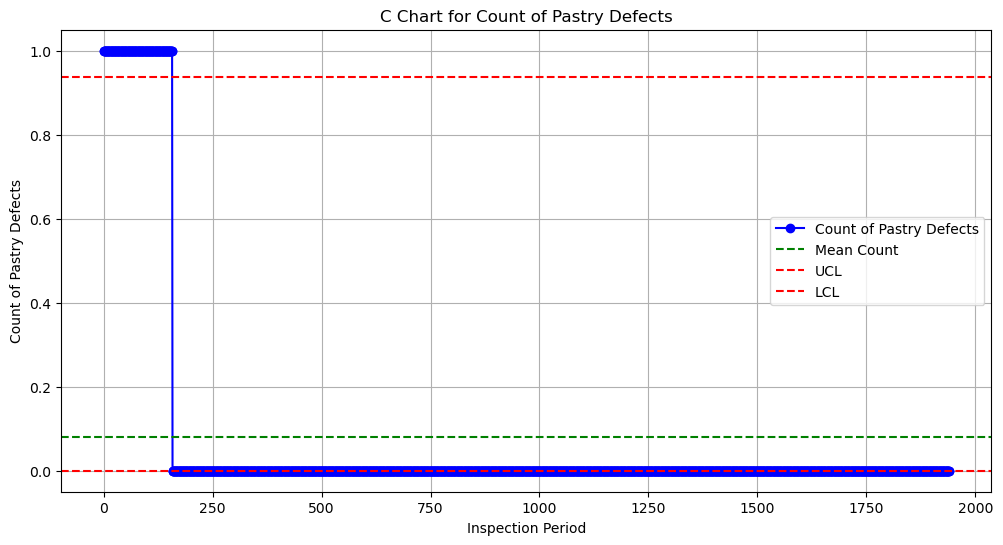

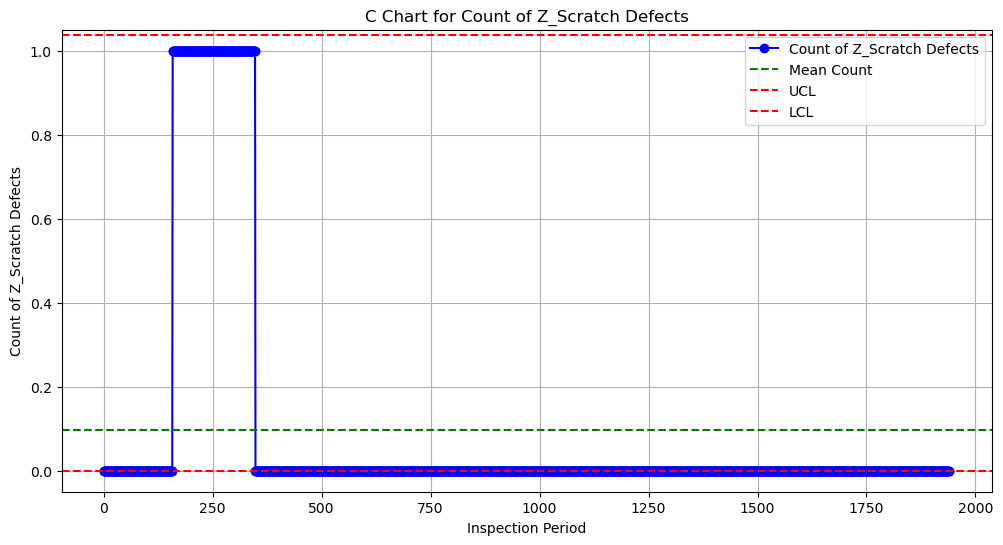

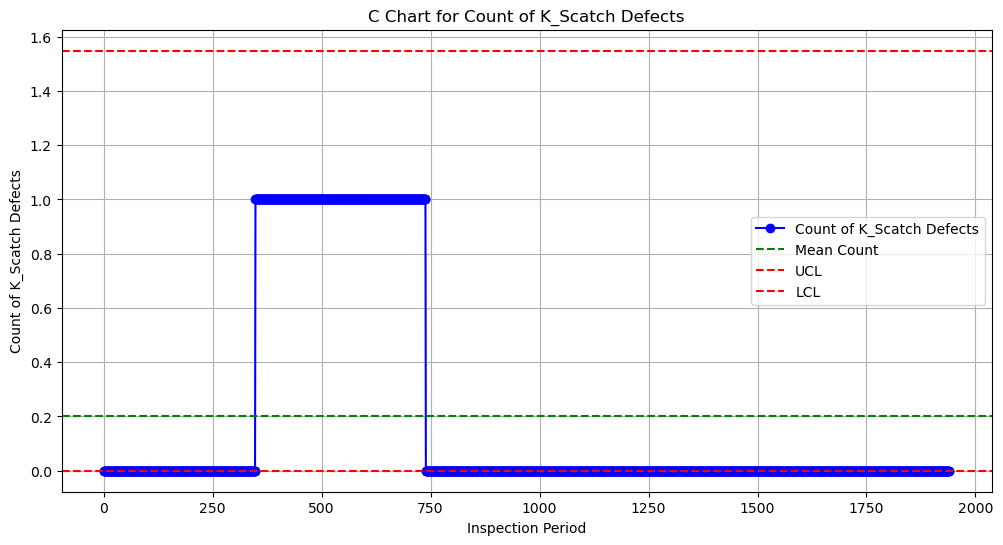

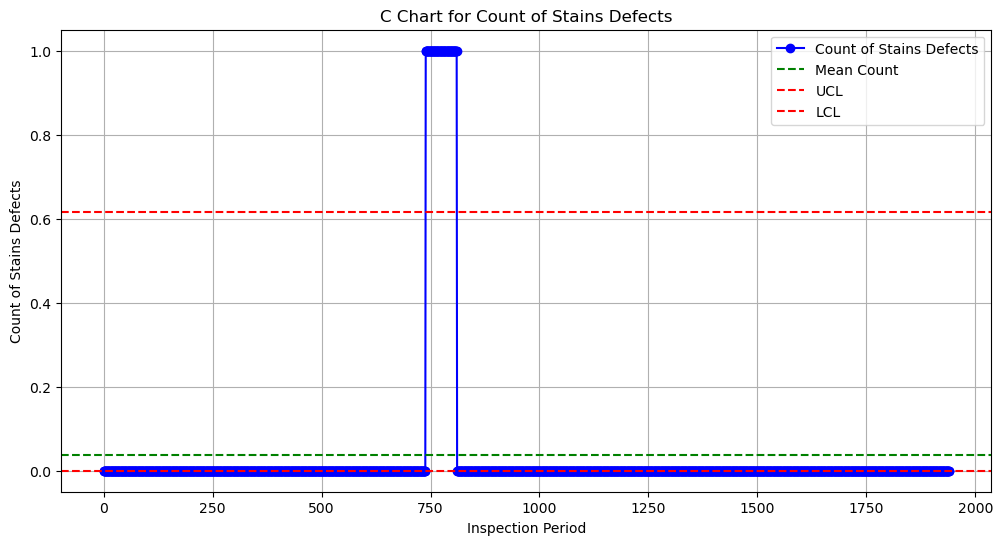

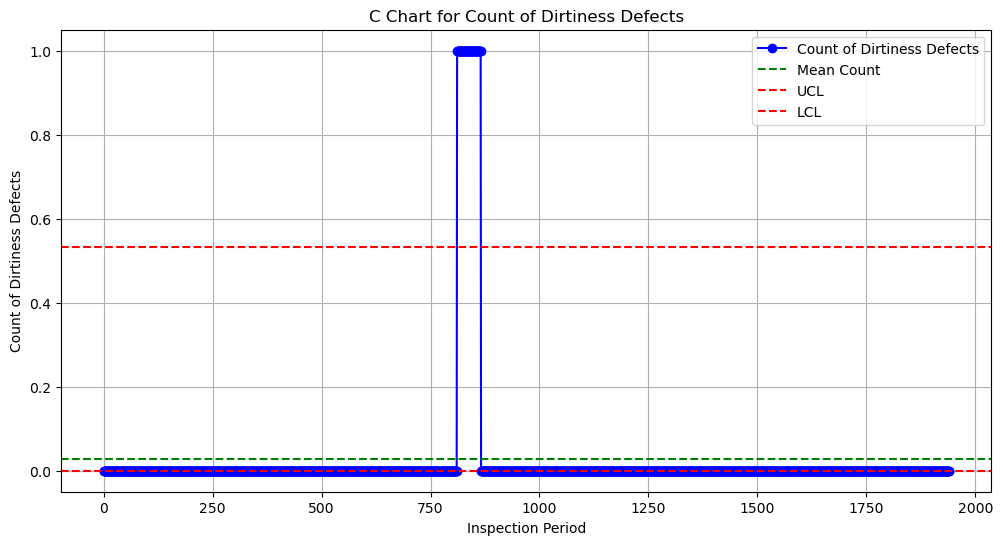

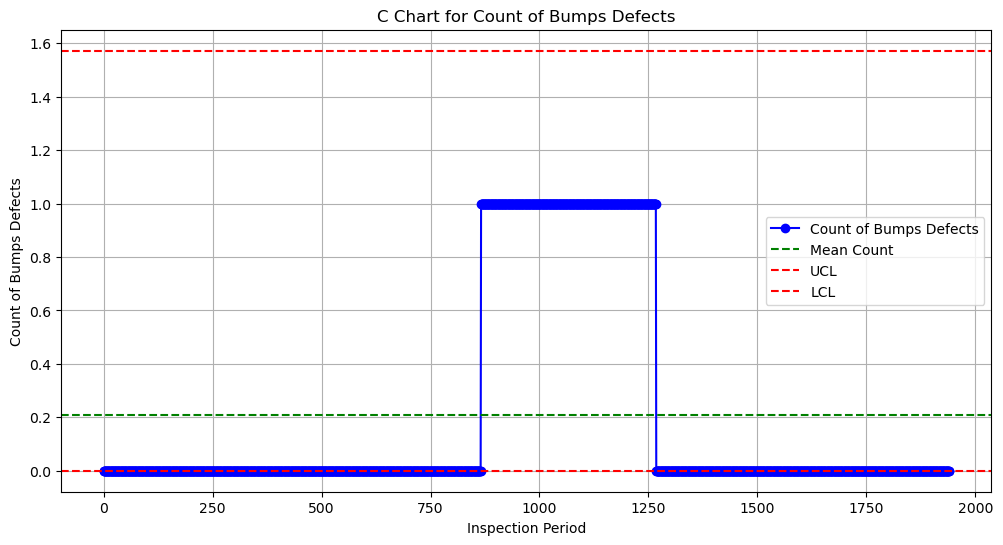

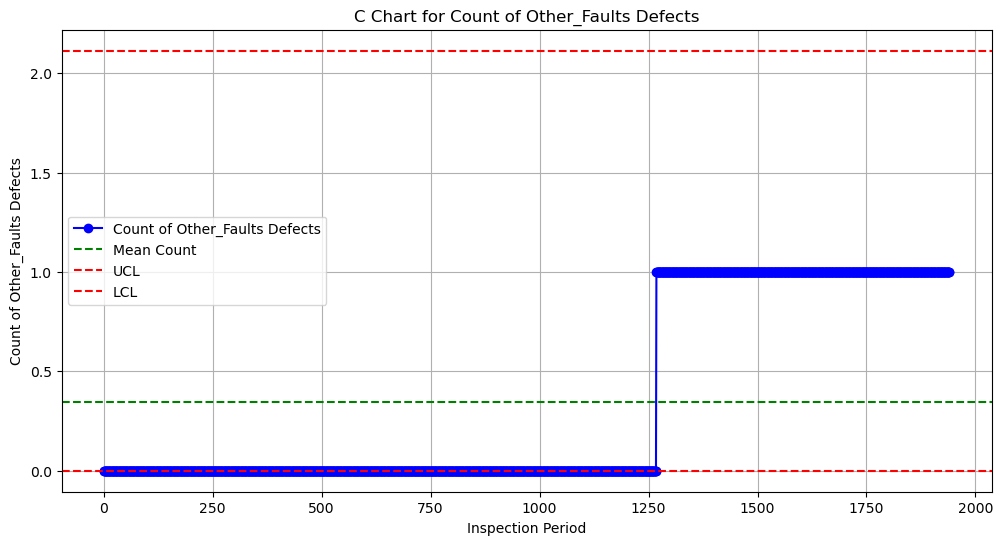

In [15]:
# Function to plot C-chart for a given fault type
def plot_c_chart(fault_type):
    # Count defects for the fault type
    defects = data[fault_type].values
    C_bar = np.mean(defects)

    # Control limits for C-chart
    UCL_C = C_bar + 3 * np.sqrt(C_bar)
    LCL_C = max(C_bar - 3 * np.sqrt(C_bar), 0)

    # Plot C-chart
    plt.figure(figsize=(12, 6))
    plt.plot(
        defects,
        marker="o",
        linestyle="-",
        color="b",
        label=f"Count of {fault_type} Defects",
    )
    plt.axhline(C_bar, color="g", linestyle="--", label="Mean Count")
    plt.axhline(UCL_C, color="r", linestyle="--", label="UCL")
    plt.axhline(LCL_C, color="r", linestyle="--", label="LCL")
    plt.title(f"C Chart for Count of {fault_type} Defects")
    plt.xlabel("Inspection Period")
    plt.ylabel(f"Count of {fault_type} Defects")
    plt.legend()
    plt.grid(True)
    plt.show()


# Generate C-charts for all fault types
for fault_type in fault_types:
    plot_c_chart(fault_type)